## SVM
### O Support Vector Machine (SVM) é um poderoso algoritmo de aprendizado de máquina usado tanto para classificação quanto para regressão. Originalmente, o SVM foi desenvolvido para problemas de classificação binária, onde o objetivo é separar duas classes diferentes com um hiperplano. No entanto, para problemas de classificação multiclasse, onde existem mais de duas classes, o SVM precisa ser adaptado. Existem duas abordagens principais para adaptar o SVM para classificação multiclasse: "One-vs-Rest" (OvR) e "One-vs-One" (OvO).

### **One-vs-Rest (OvR)**
#### Nesta abordagem, também conhecida como One-vs-All, um classificador SVM binário é treinado para cada classe, separando uma classe das demais. Por exemplo, para um problema com três classes (A, B e C), o processo é o seguinte:

#### -Treina-se um SVM para distinguir a classe A contra as classes B e C combinadas.
#### -Treina-se um SVM para distinguir a classe B contra as classes A e C combinadas.
#### -Treina-se um SVM para distinguir a classe C contra as classes A e B combinadas.

##### Durante a fase de predição, o modelo que dá a maior margem (distância do ponto ao hiperplano) é escolhido como a predição final.

### **One-vs-One (OvO)**
#### Nesta abordagem, um classificador SVM binário é treinado para cada par de classes. Para um problema com três classes (A, B e C), o processo é o seguinte:

#### -Treina-se um SVM para distinguir entre as classes A e B.
#### -Treina-se um SVM para distinguir entre as classes A e C.
#### -Treina-se um SVM para distinguir entre as classes B e C.
#### Para um problema com n classes, é necessário treinar $ \frac{n(n−1)}{2}$ classificadores. Durante a fase de predição, cada classificador faz uma predição, e a classe que recebe o maior número de votos é escolhida como a predição final.

#### Ambas as abordagens têm suas vantagens e desvantagens, e a escolha entre OvR e OvO pode depender do contexto do problema, da quantidade de classes e dos recursos computacionais disponíveis. O SVM continua sendo uma ferramenta poderosa para tarefas de classificação, mesmo em cenários de múltiplas classes, quando devidamente adaptado.

-----------------------------------------------------------------------------------------------------------------------------------------

### Para treinar um modelo de SVM (Support Vector Machine) para classificação multiclasse da coluna 'PROF_MATEMATICA_CATEG' no dataset CLASS.csv, podemos seguir os passos abaixo. Vou assumir que você já tem os dados carregados no DataFrame gnetDf e que as colunas categorizadas mencionadas na descrição já estão prontas.

### **1-Importar Bibliotecas Necessárias:**
#### Vamos importar as bibliotecas essenciais para manipulação de dados e treinamento do modelo.

### **2-Selecionar as Features e o Target:**
#### Definir as colunas que serão usadas como features (X) e a coluna alvo (y).

### **3-Pré-processamento dos Dados:**
#### Converter os dados categóricos para um formato numérico adequado (se necessário).

### **4-Dividir o Dataset em Conjunto de Treinamento e Teste:**
#### Separar os dados em conjuntos de treinamento e teste para avaliar o desempenho do modelo.

### **5-Treinar o Modelo de SVM:**
#### Utilizar a classe SVC do Scikit-learn para treinar o modelo.

### **6-Avaliar o Modelo:**
#### Medir a acurácia e outras métricas relevantes para avaliar o desempenho do modelo.

---------------------------------------------------------------------------------------------------------------------------------------

In [36]:
#Importar Biblioteca
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
# Carregar o dataset
gnetDf = pd.read_csv("datasets/CLASS.csv")

In [38]:
# Selecionar as colunas de interesse
features = ['SEXO_CATEG', 'IDADE_CATEG', 'FORMACAO_MAE_CATEG', 'FORMACAO_PAI_CATEG', 'ACESSO_INTERNET_CATEG',
            'NUMERO_COMPUTADORES_CATEG', 'INICIOU_ESTUDOS_CATEG', 'ENSINO_FUNDAMENTAL_CATEG', 'REPROVOU_CATEG',
            'ABANDONOU_CATEG', 'GESTAO_CATEG', 'DUVIDAS_CATEG', 'CORRIGEM_CATEG',
            'PONTOS_PORTUGUES_CATEG', 'PROF_PORTUGUES_CATEG','TURNO_ESCOLAR_CATEG']

# Retirar 'PONTOS_MATEMATICA_CATEG' por conta do viés com a coluna target
target = 'PROF_MATEMATICA_CATEG'

In [39]:
# Criar X e y
X = gnetDf[features]
y = gnetDf[target]

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [40]:
# Criar e treinar o modelo SVM
svm_model = SVC(kernel='linear', C=1.0, tol=0.001, max_iter=1000)
svm_model.fit(X_train, y_train)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=1000)

In [41]:
# Predições no conjunto de teste
y_pred = svm_model.predict(X_test)


In [42]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print('Matriz de Confusão:')
print(conf_matrix)

Matriz de Confusão:
[[540 195 125 373  14]
 [754 393 252 832  84]
 [220 157 138 472  93]
 [ 57  59  99 221  54]
 [  5  14  25  57  17]]


In [43]:
# Imprimir o relatório de classificação
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred, target_names=['1', '2', '3', '4','5']))

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.34      0.43      0.38      1247
           2       0.48      0.17      0.25      2315
           3       0.22      0.13      0.16      1080
           4       0.11      0.45      0.18       490
           5       0.06      0.14      0.09       118

    accuracy                           0.25      5250
   macro avg       0.24      0.27      0.21      5250
weighted avg       0.35      0.25      0.25      5250



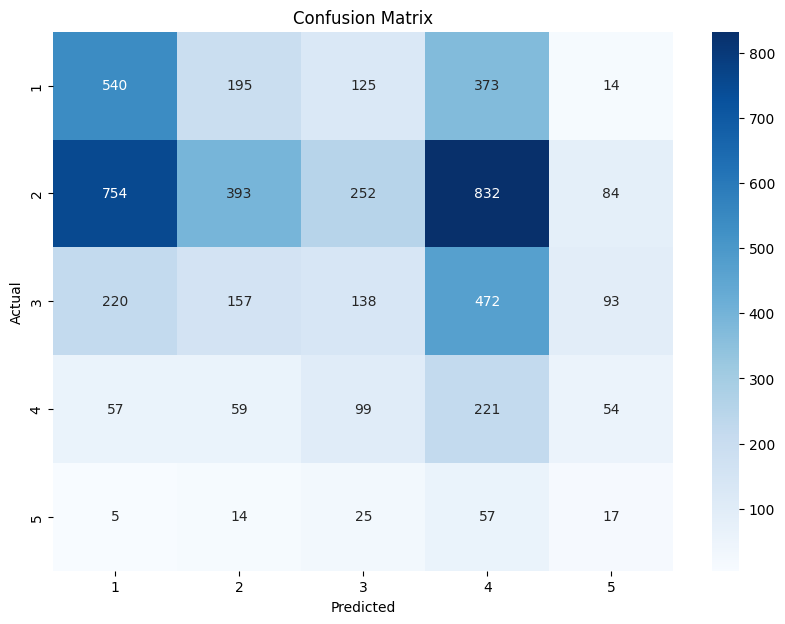

In [44]:
# Visualizar a matriz de confusão usando seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3','4' ,'5'], yticklabels=['1', '2', '3','4' ,'5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()